In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
!pip install mlrose
!pip install scikit-pyplot
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use case, feel 

ModuleNotFoundError: No module named 'mlrose'

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:


data

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [4]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
data.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [8]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Workclass': 9,
 'Education': 16,
 'Marital_status': 7,
 'Occupation': 15,
 'Relationship': 6,
 'Race': 5,
 'Sex': 2,
 'Native_country': 42,
 'Income': 2}

In [9]:
data.select_dtypes('object')

Workclass    Education       Marital_status  \
0       Self-emp-not-inc    Bachelors   Married-civ-spouse   
1                Private      HS-grad             Divorced   
2                Private         11th   Married-civ-spouse   
3                Private    Bachelors   Married-civ-spouse   
4                Private      Masters   Married-civ-spouse   
...                  ...          ...                  ...   
32555            Private   Assoc-acdm   Married-civ-spouse   
32556            Private      HS-grad   Married-civ-spouse   
32557            Private      HS-grad              Widowed   
32558            Private      HS-grad        Never-married   
32559       Self-emp-inc      HS-grad   Married-civ-spouse   

               Occupation    Relationship    Race      Sex  Native_country  \
0         Exec-managerial         Husband   White     Male   United-States   
1       Handlers-cleaners   Not-in-family   White     Male   United-States   
2       Handlers-cleaners         Husband   Black     Male   United-States   
3          Prof-specialty            Wife   Black   Female            Cuba   
4         Exec-managerial            Wife   White   Female   United-States   
...                   ...             ...     ...      ...             ...   
32555        Tech-support            Wife   White   Female   United-States   
32556   Machine-op-inspct         Husband   White     Male   United-States   
32557        Adm-clerical       Unmarried   White   Female   United-States   
32558        Adm-clerical       Own-child   White     Male   United-States   
32559     Exec-managerial            Wife   White   Female   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 9 columns]

In [10]:
col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

ValueError: could not convert string to float: ' Self-emp-not-inc'

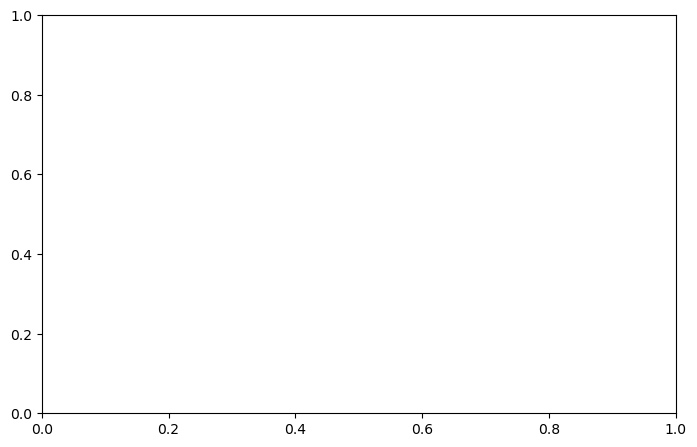

In [11]:
plt.figure(figsize=(18,30))
for i in range(len(col)):
  plt.subplot(5,2,i+1)
  sns.countplot(data[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout()

In [12]:
data.select_dtypes(exclude='object')

Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week
0       50   83311             13             0             0              13
1       38  215646              9             0             0              40
2       53  234721              7             0             0              40
3       28  338409             13             0             0              40
4       37  284582             14             0             0              40
...    ...     ...            ...           ...           ...             ...
32555   27  257302             12             0             0              38
32556   40  154374              9             0             0              40
32557   58  151910              9             0             0              40
32558   22  201490              9             0             0              20
32559   52  287927              9         15024             0              40

[32560 rows x 6 columns]

In [13]:
col1=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

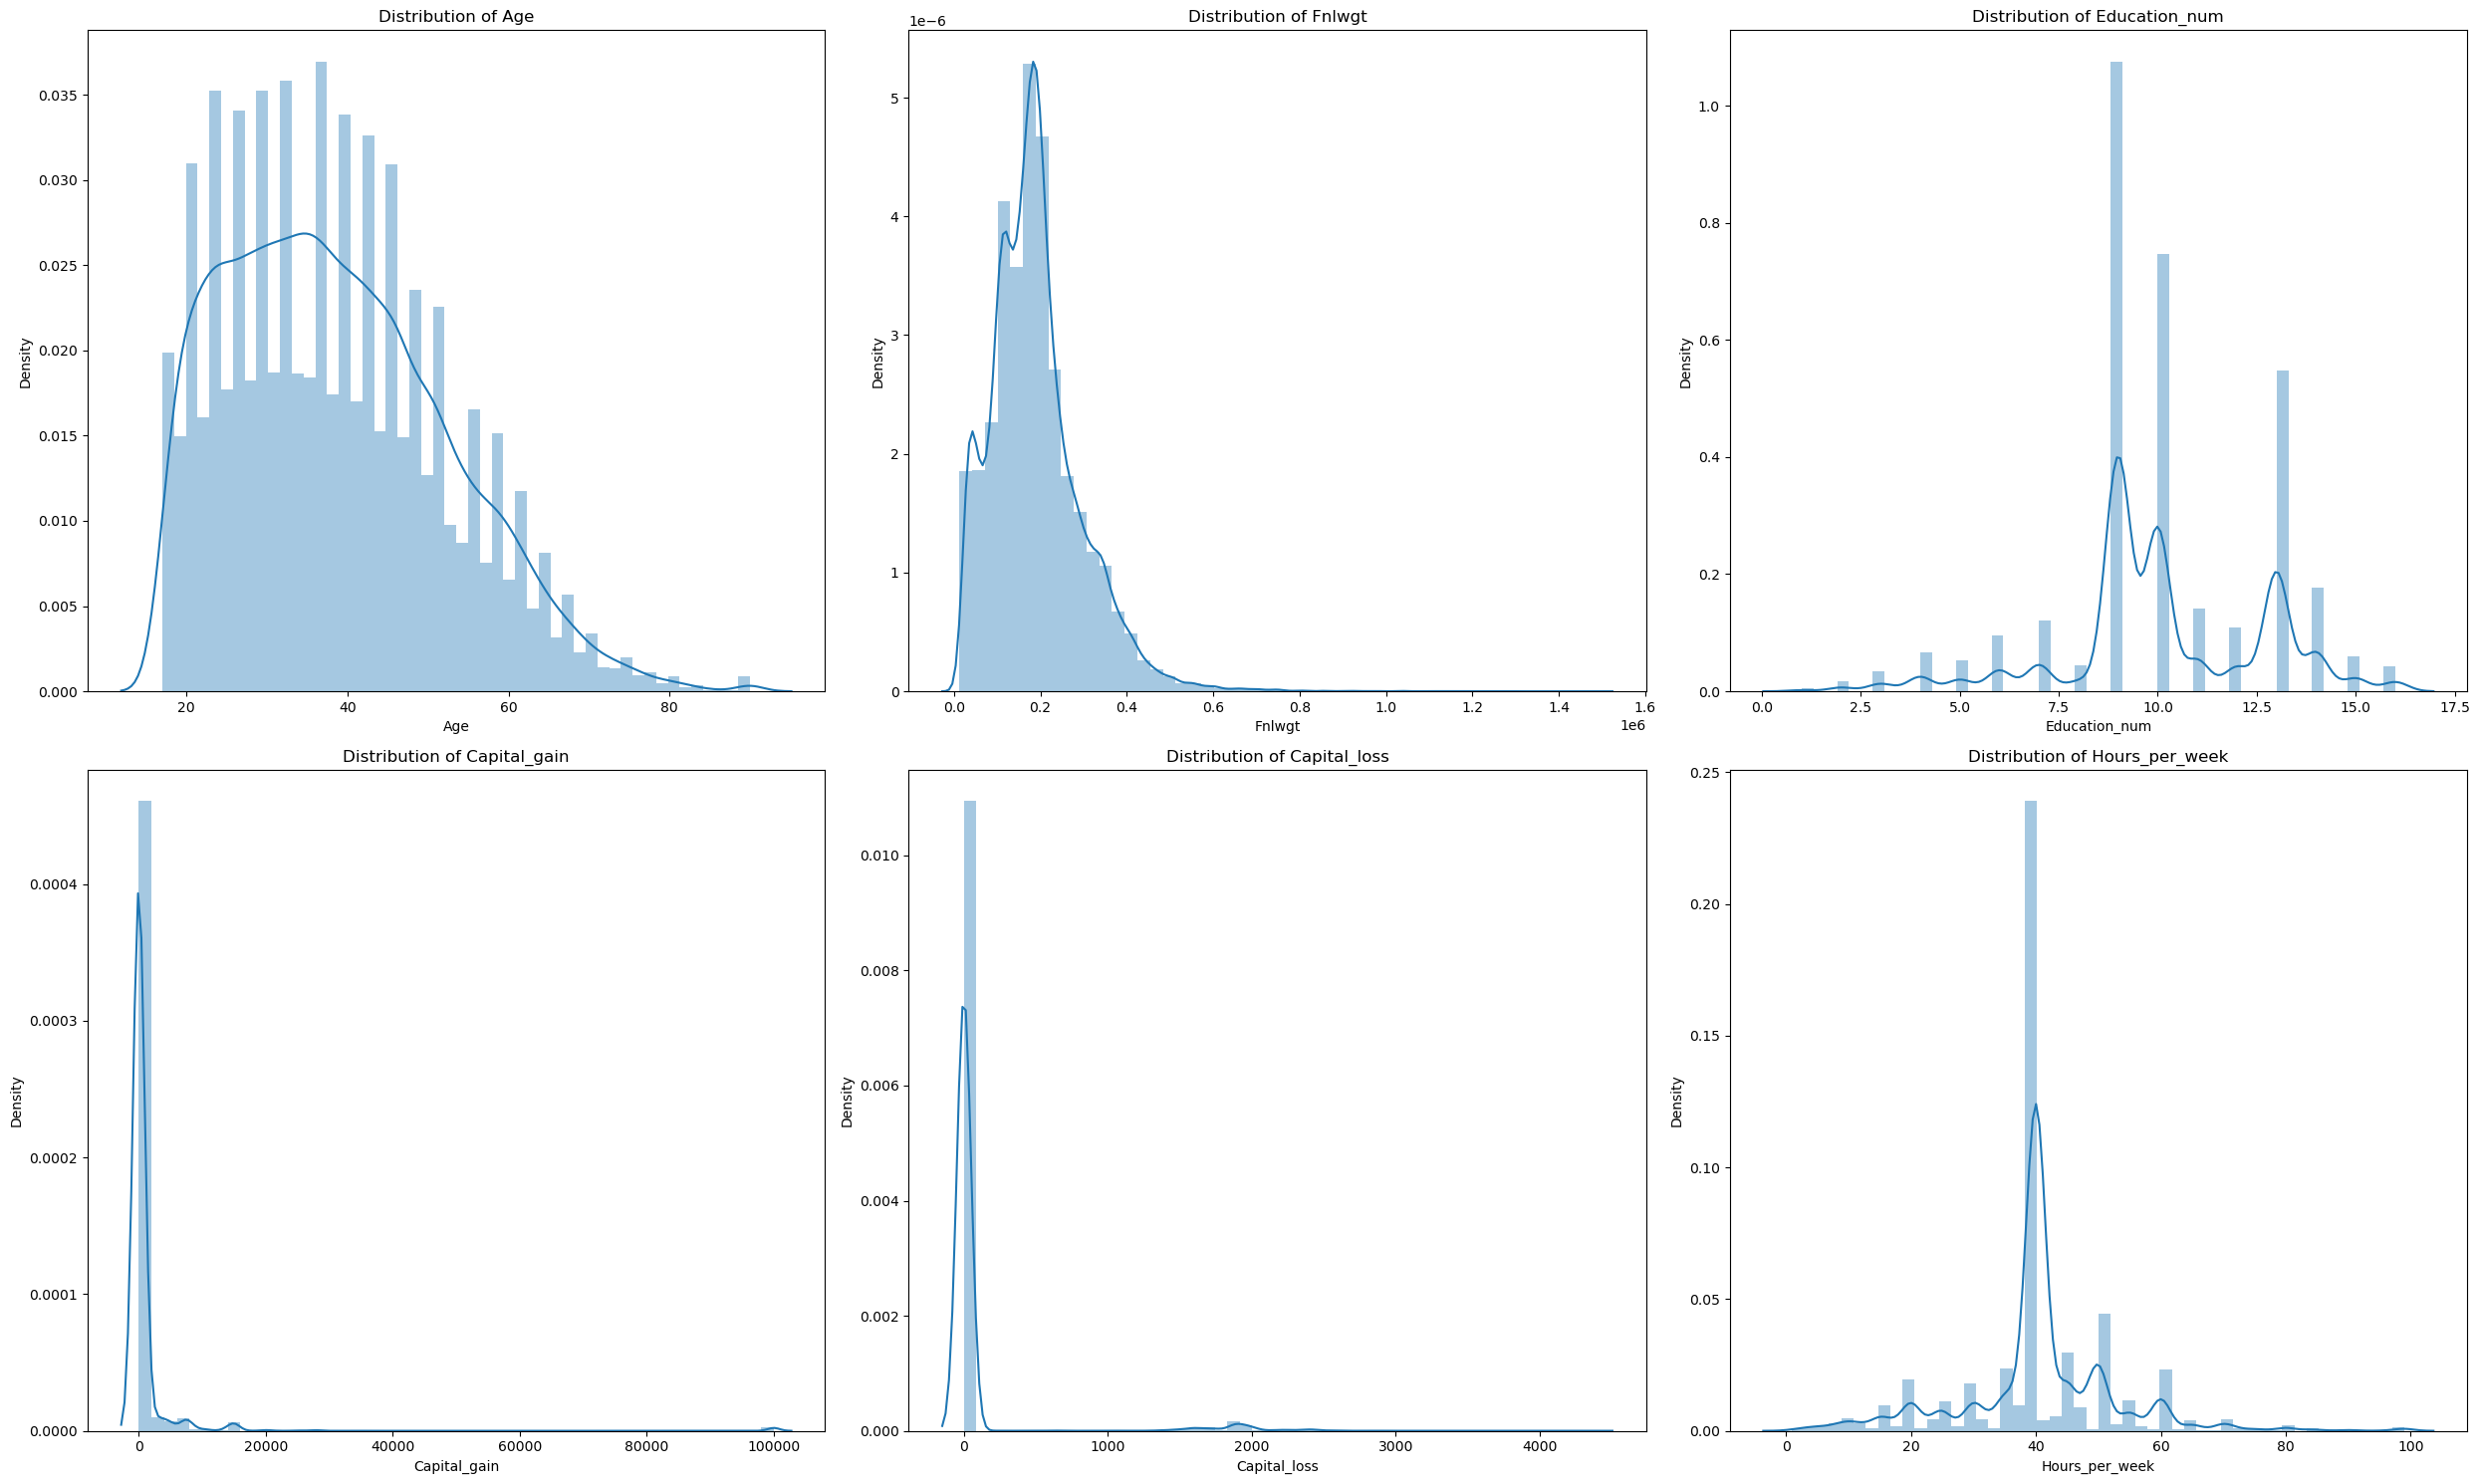

In [14]:
plt.figure(figsize=(25,15))
for i in range(len(col1)):
  plt.subplot(2,3,i+1)
  sns.distplot(data[col1[i]])
  plt.title(f"Distribution of {col1[i]}")
  plt.tight_layout()

In [15]:
col2=['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']
     

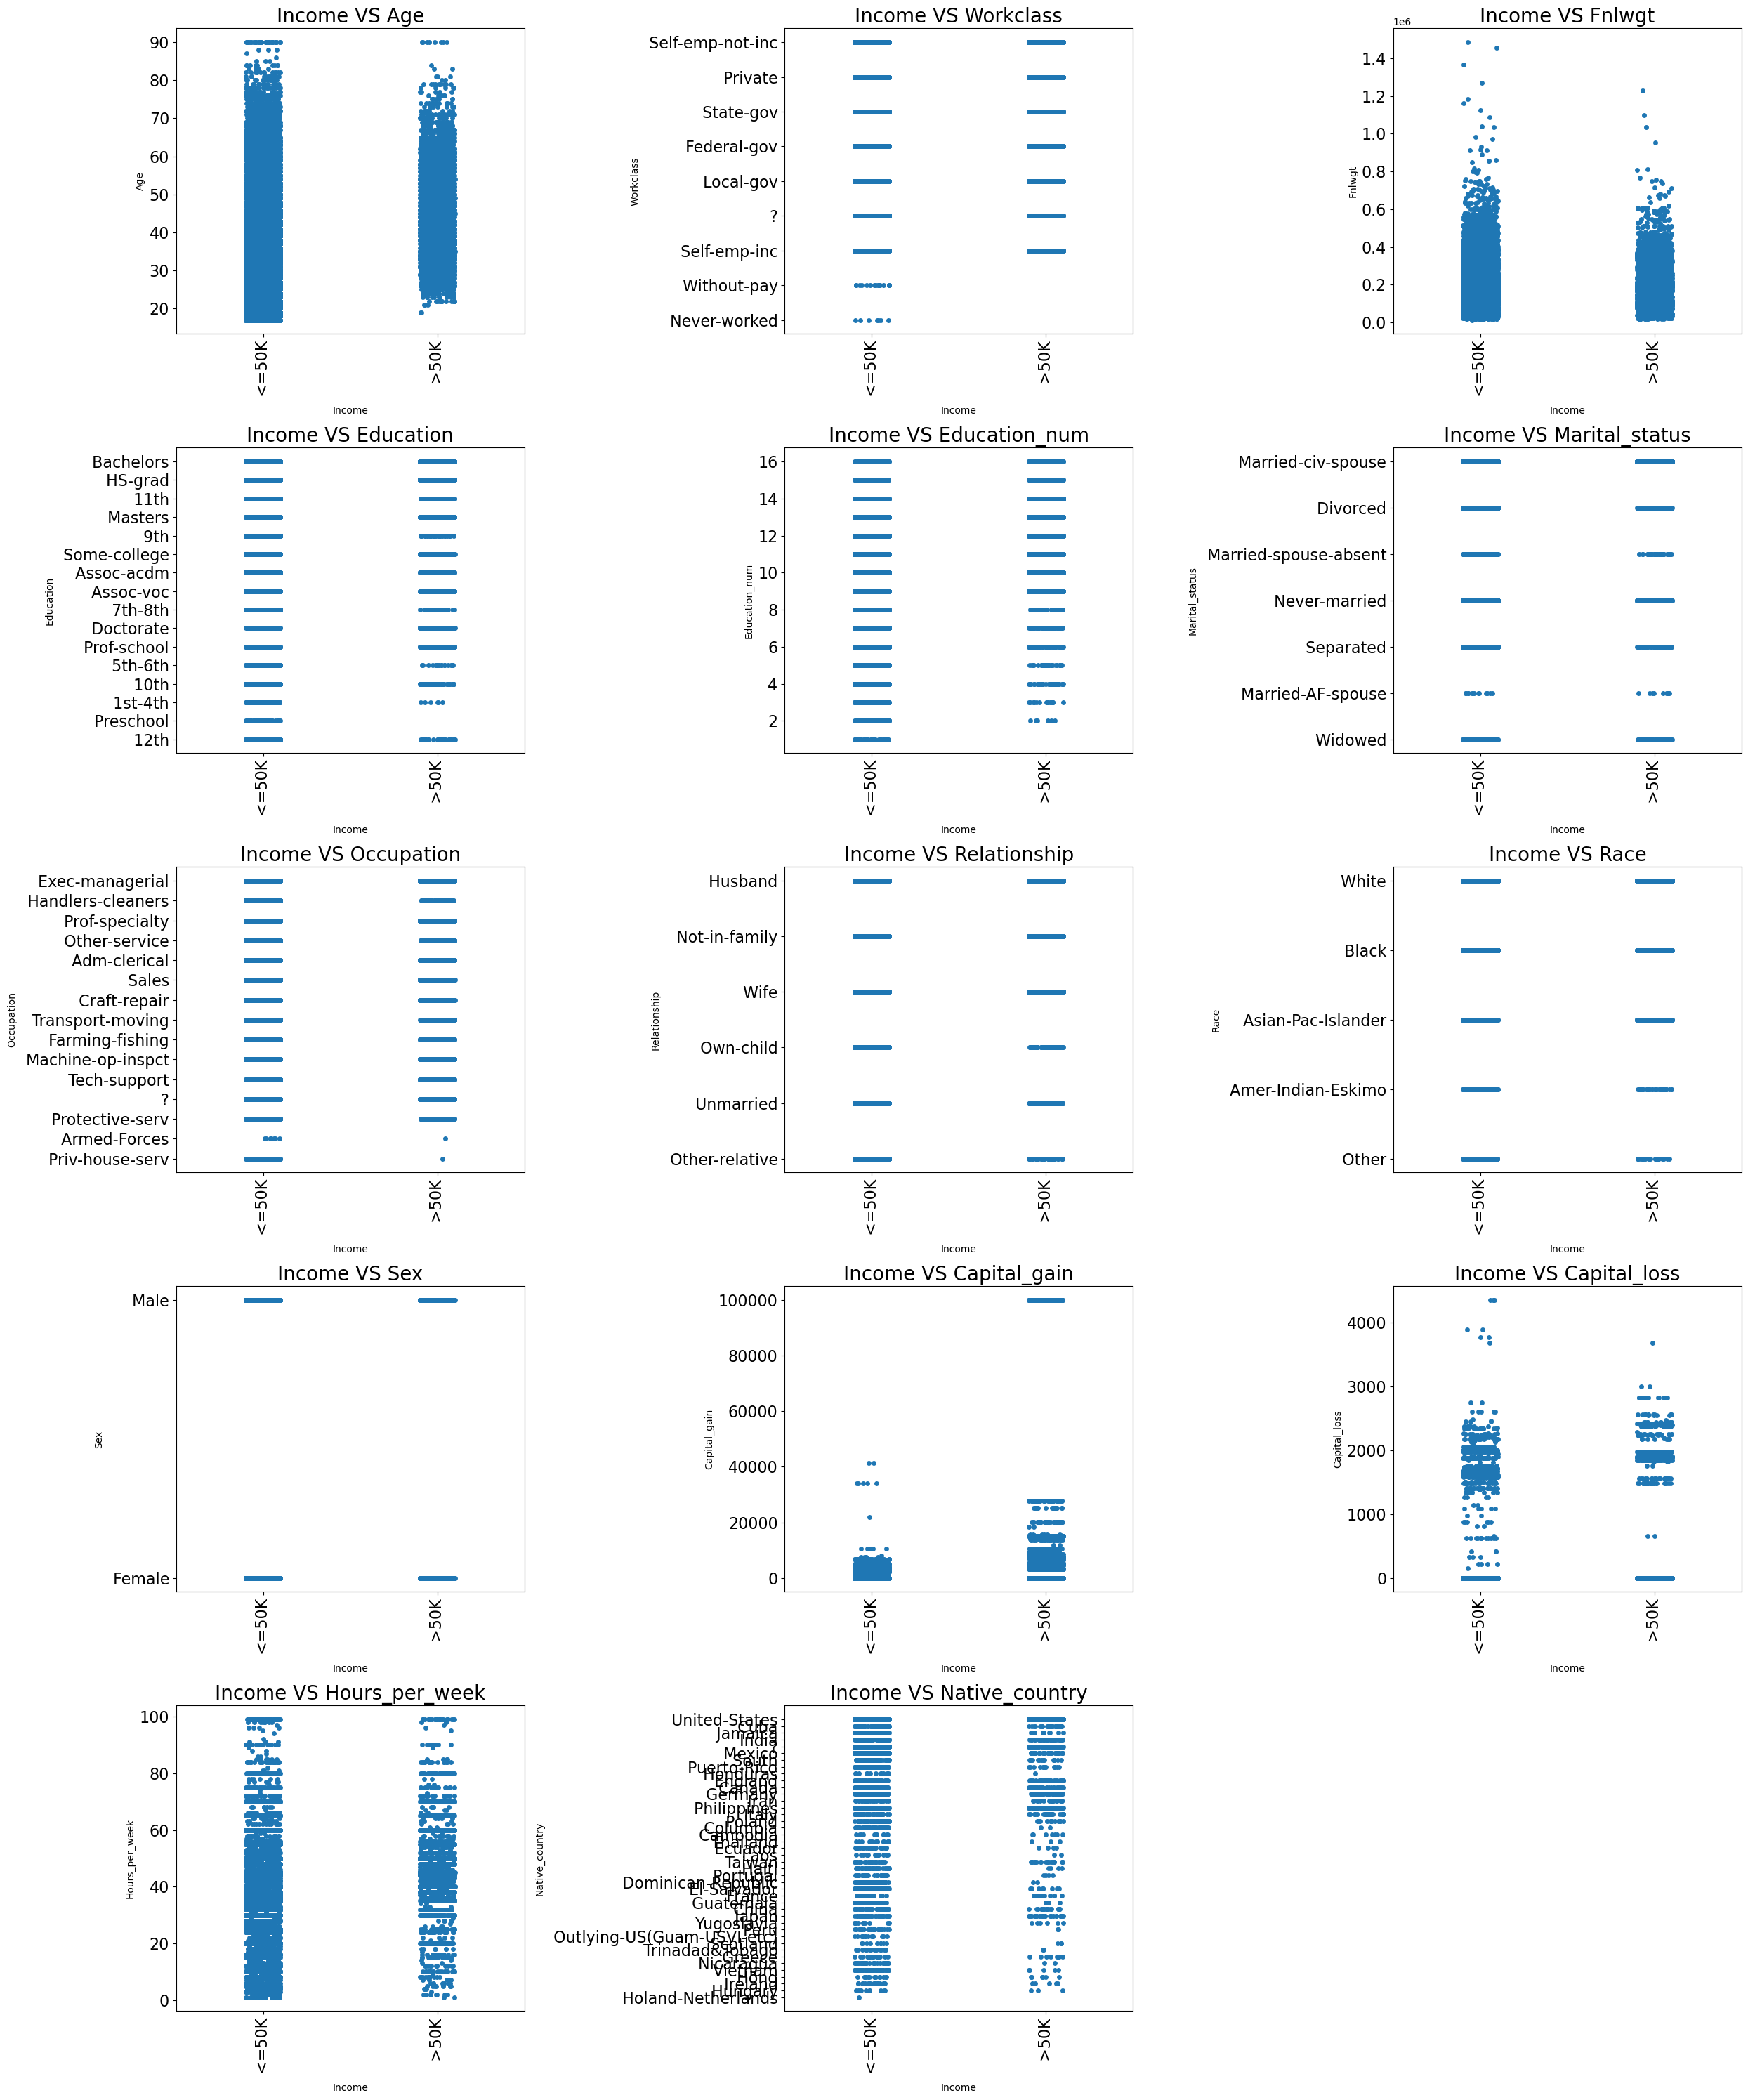

In [16]:
plt.figure(figsize=(25,30))
for i in range(len(col2)):
  plt.subplot(5,3,i+1)
  sns.stripplot(x=data['Income'],y=data[col2[i]])
  plt.title(f"Income VS {col2[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)  
  plt.yticks(fontsize=16)
  plt.tight_layout()

<Axes: xlabel='Income', ylabel='Hours_per_week'>

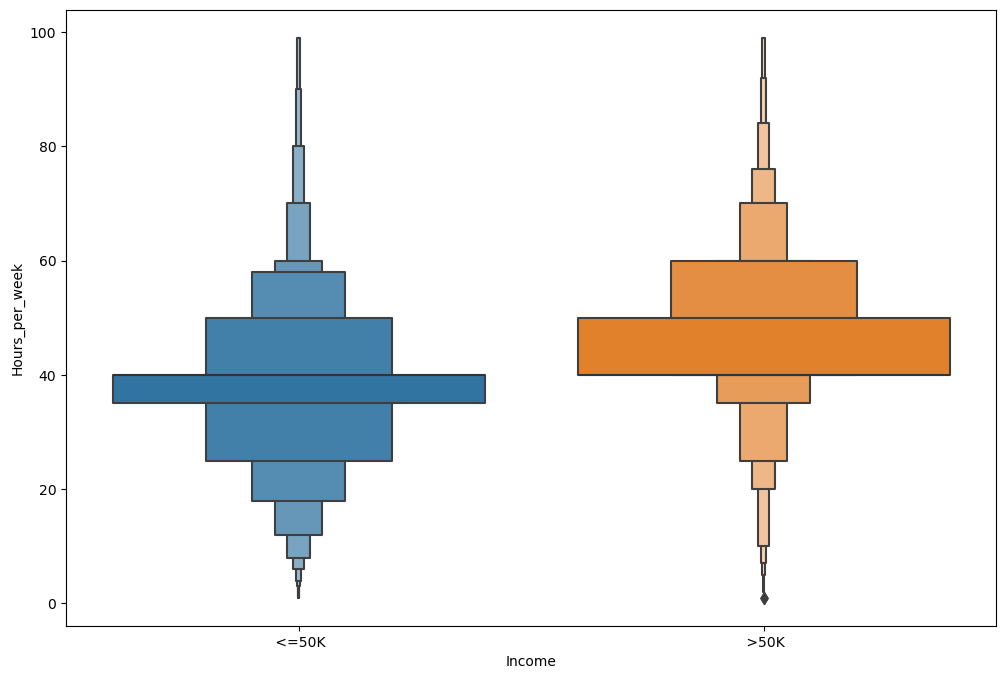

In [17]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='Income',y='Hours_per_week',data=data)

([0, 1], [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

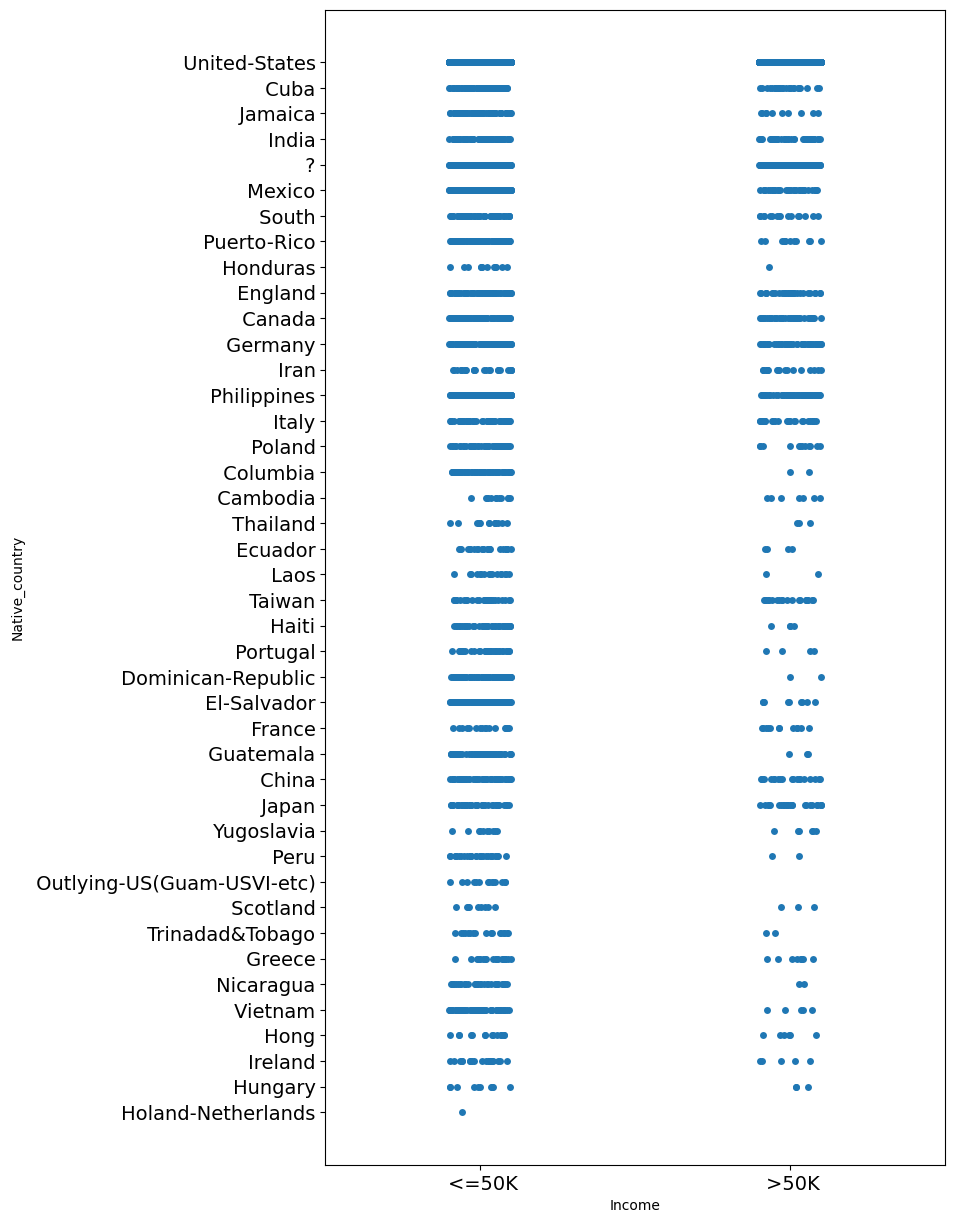

In [18]:
plt.figure(figsize=(8,15))
sns.stripplot(x='Income',y='Native_country',data=data)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

In [19]:
col3=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income','Education']

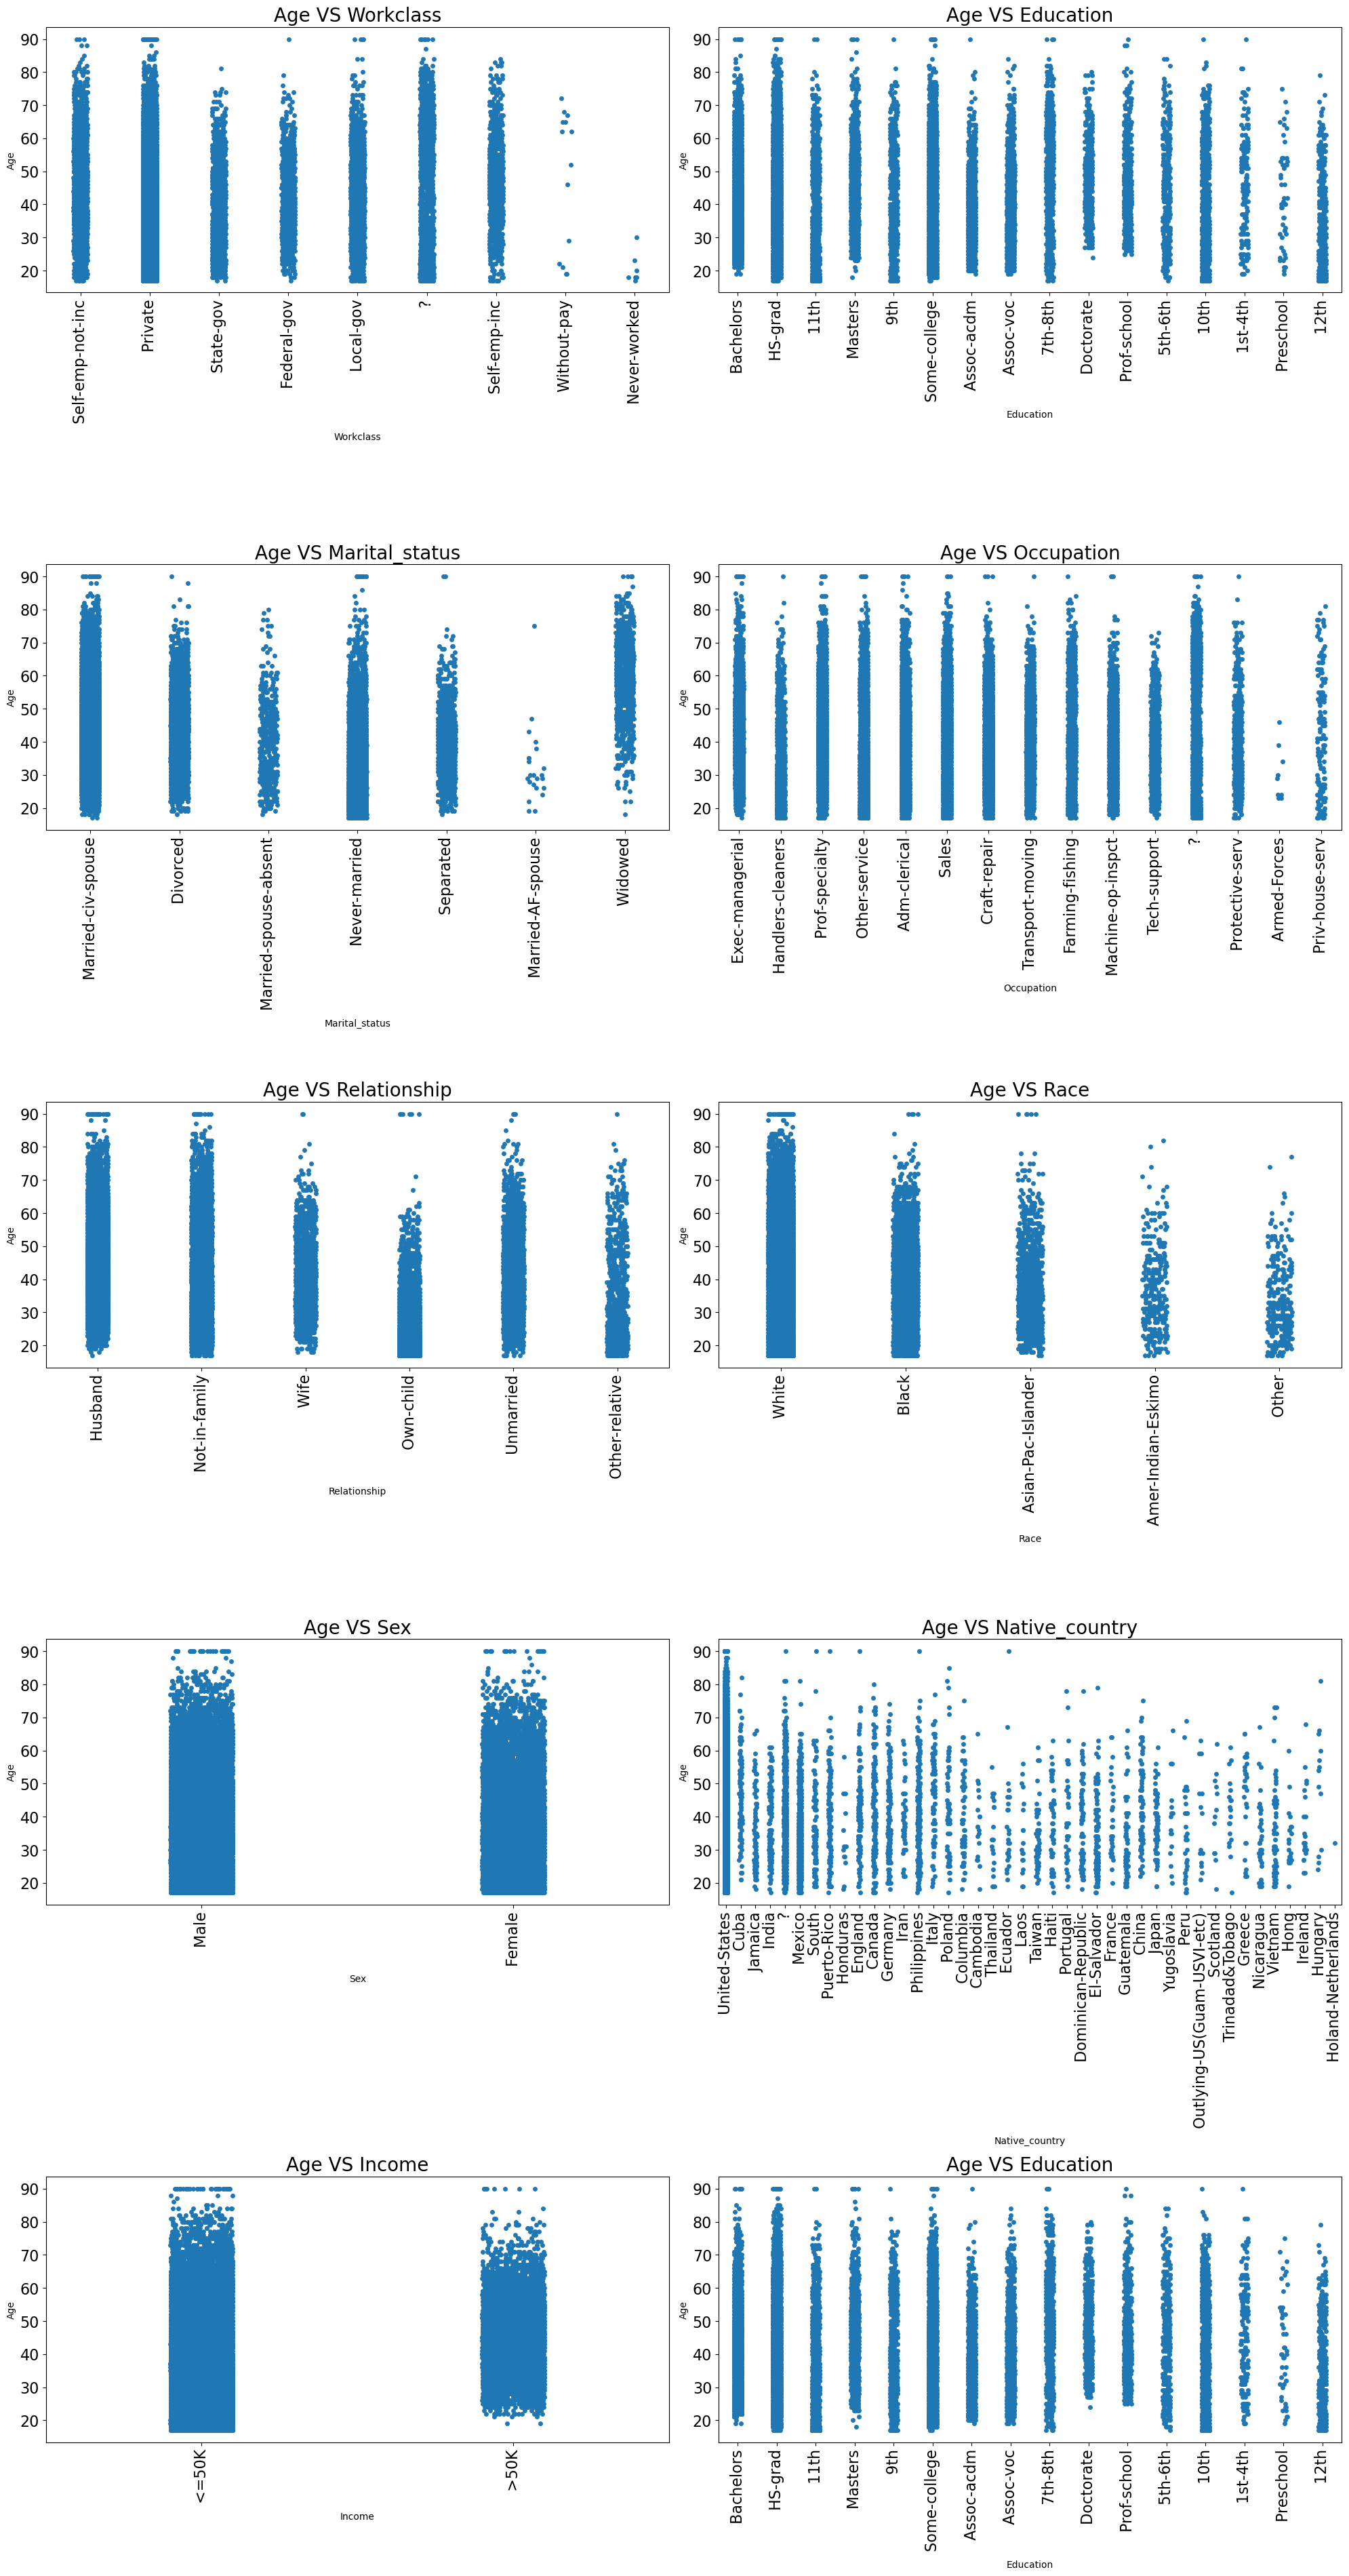

In [20]:
plt.figure(figsize=(20,60))
for i in range(len(col3)):
  plt.subplot(8,2,i+1)
  sns.stripplot(y=data['Age'],x=data[col3[i]])
  plt.title(f"Age VS {col3[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)  
  plt.yticks(fontsize=16)
  plt.tight_layout()

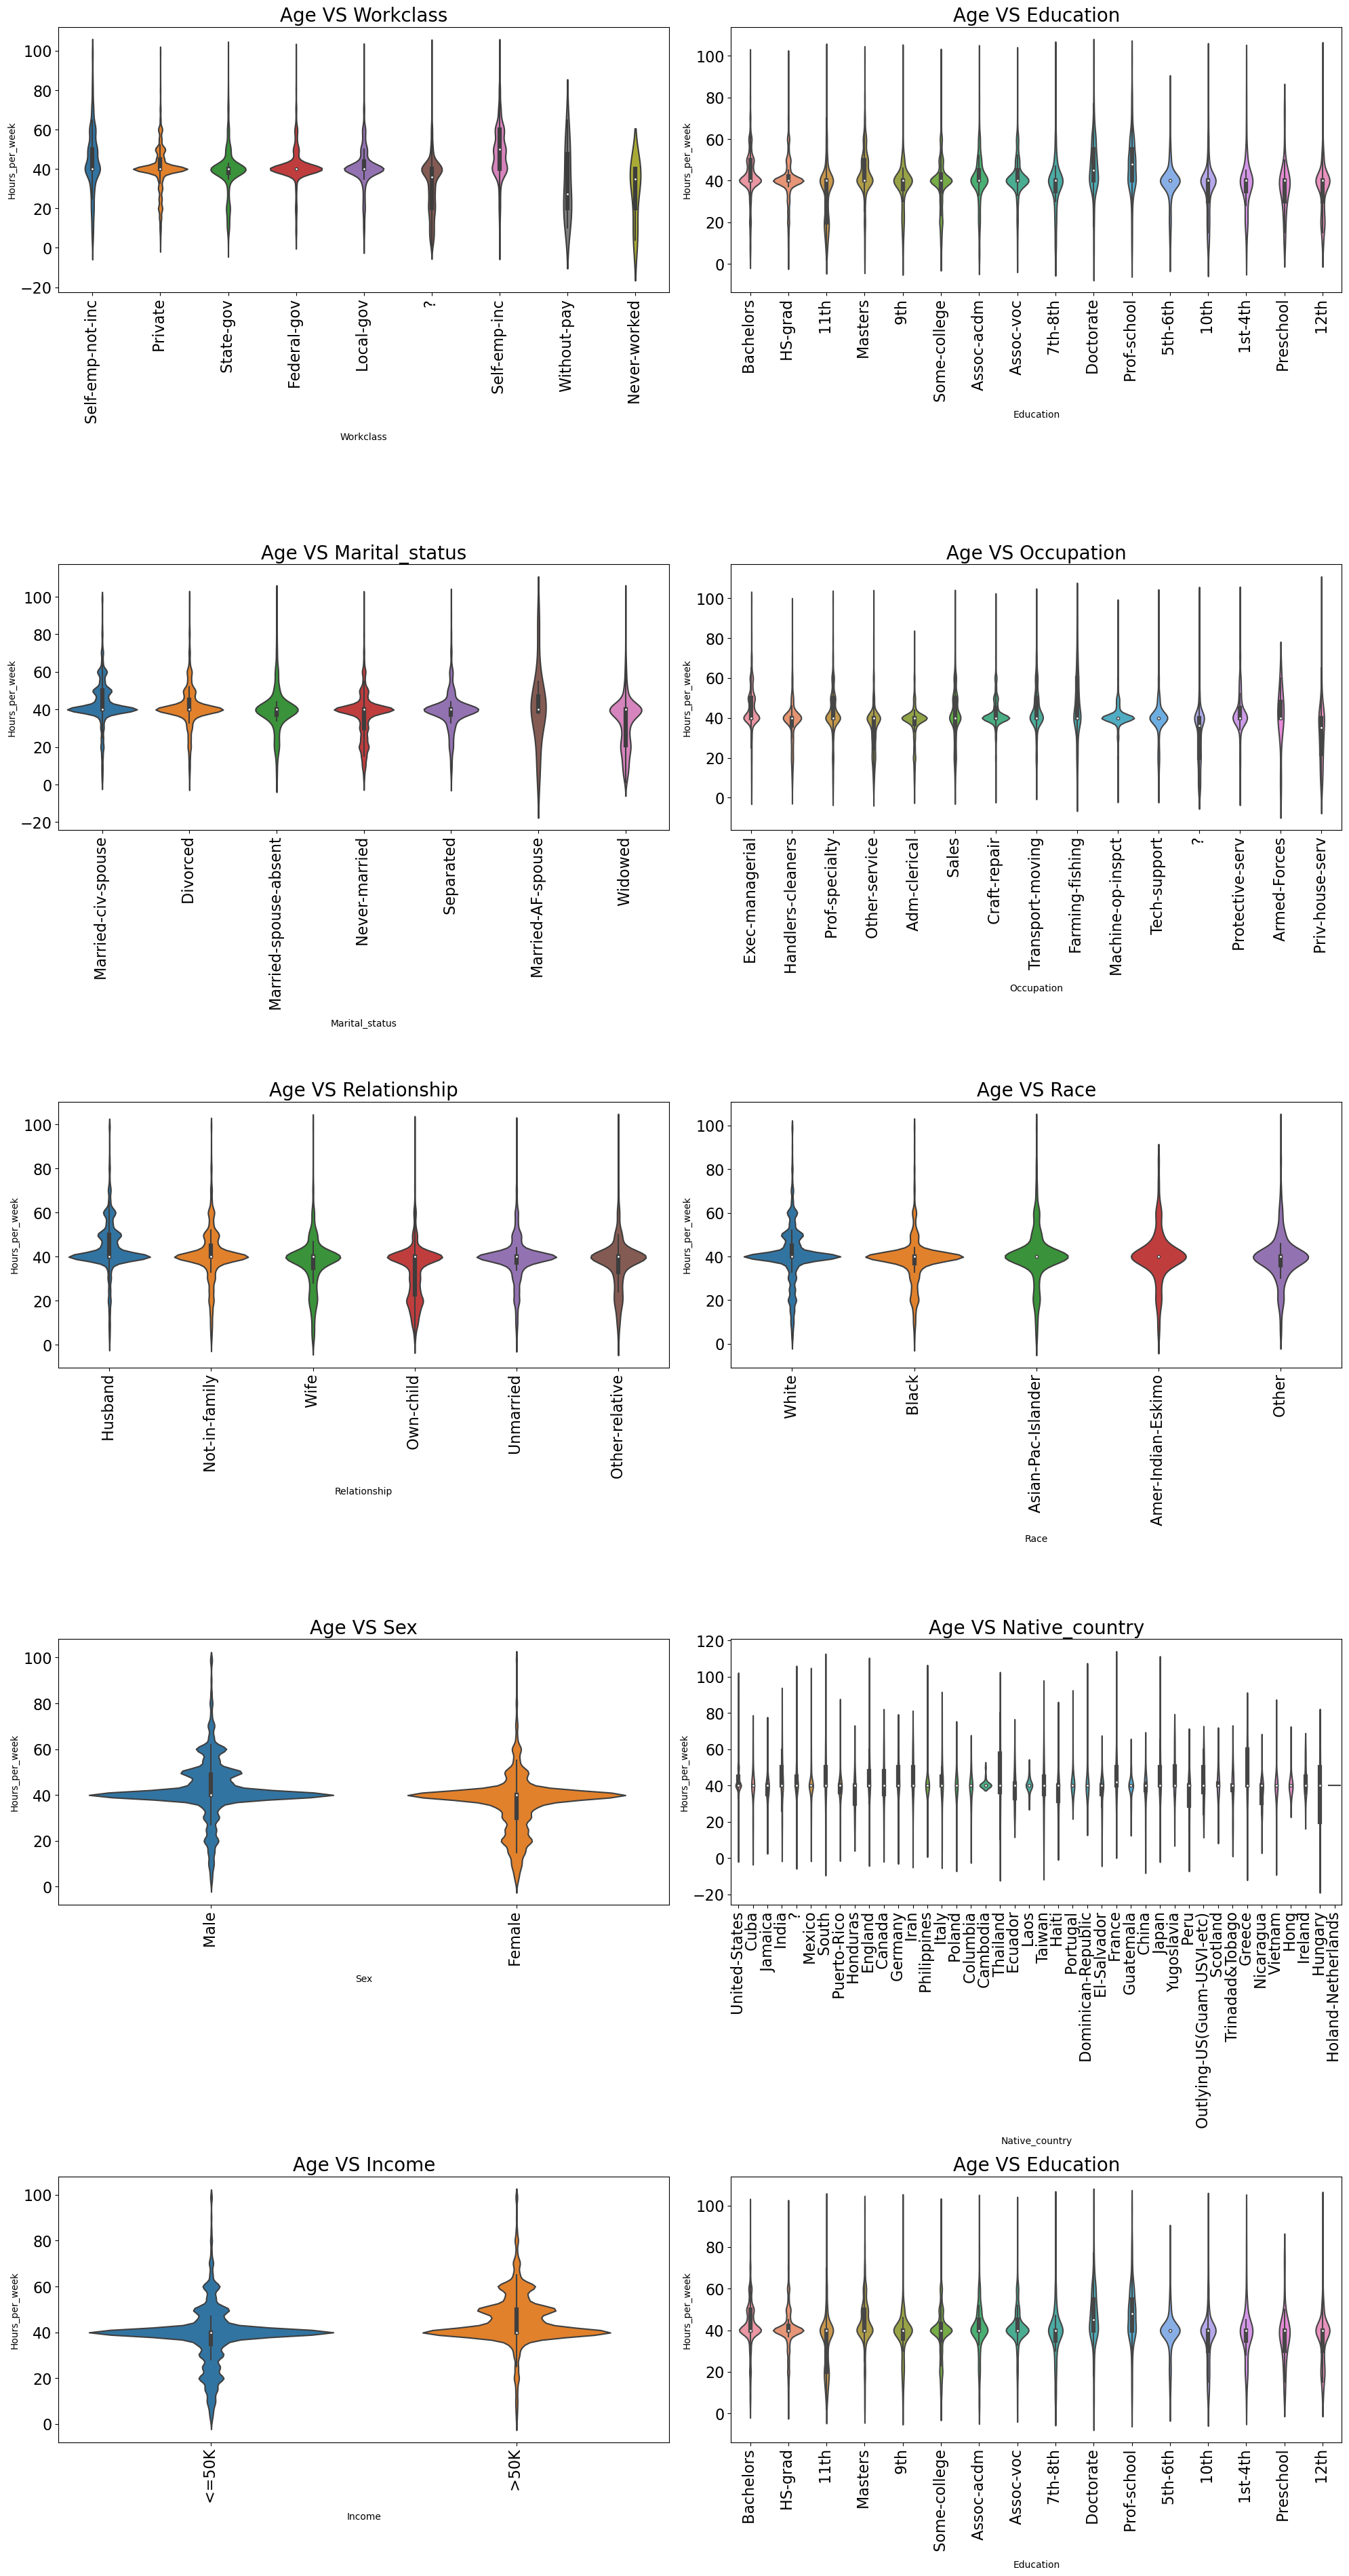

In [21]:
plt.figure(figsize=(20,60))
for i in range(len(col3)):
  plt.subplot(8,2,i+1)
  sns.violinplot(y=data['Hours_per_week'],x=data[col3[i]])
  plt.title(f"Age VS {col3[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)  
  plt.yticks(fontsize=16)
  plt.tight_layout()

In [22]:
data0=data.groupby(['Age',"Income"]).apply(lambda x:x['Hours_per_week'].count()).reset_index(name='Hours')

Text(0.5, 1.0, 'Income VS Work Of Hours')

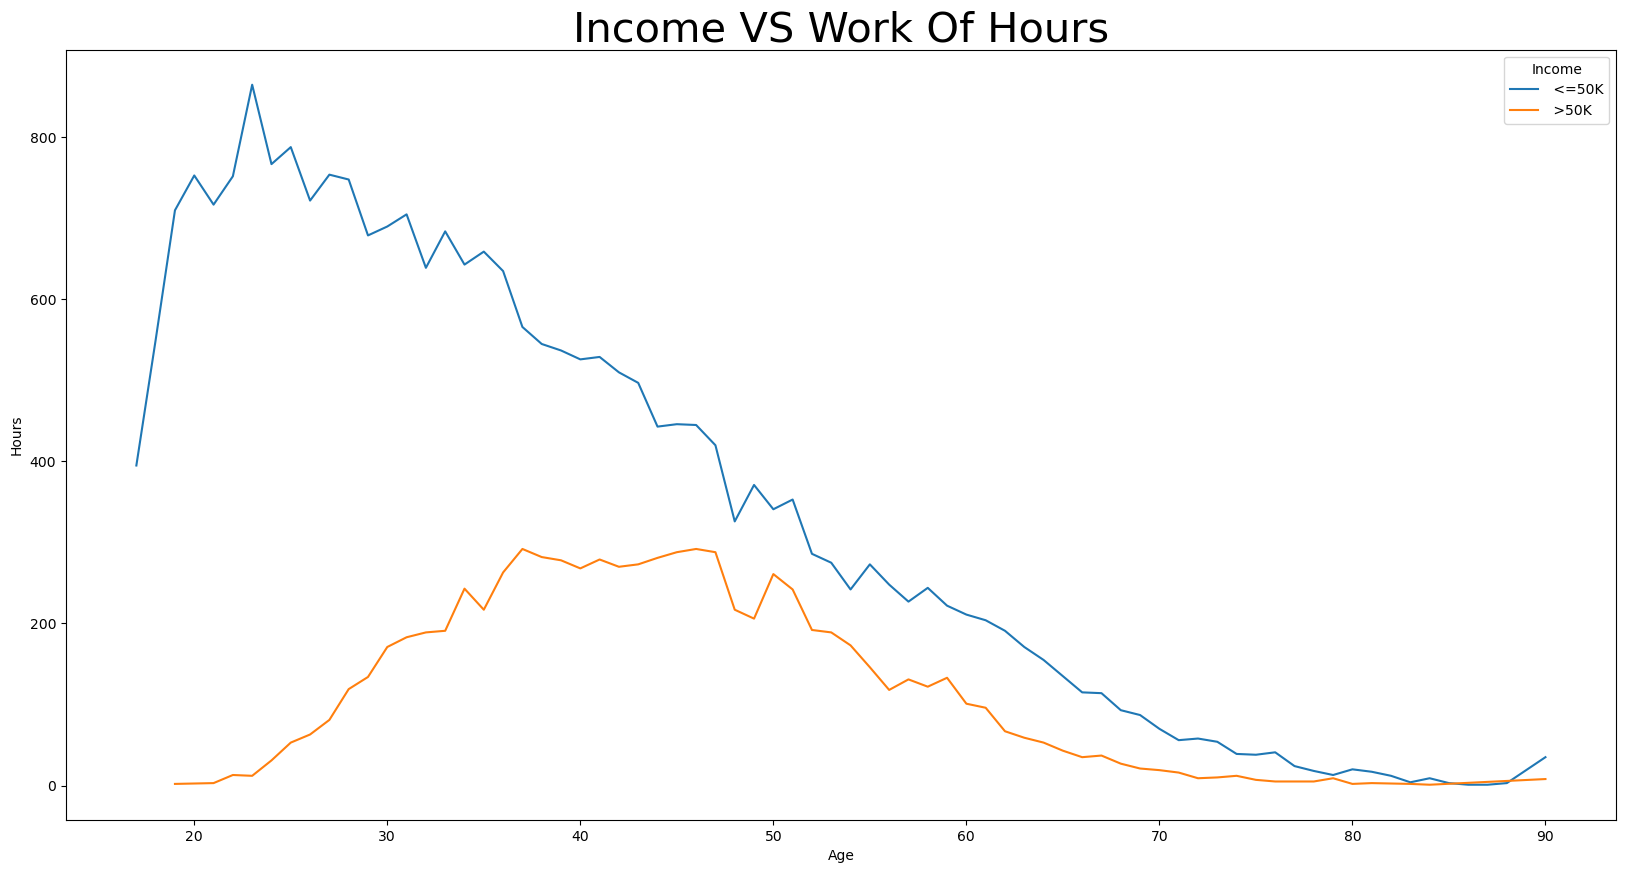

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='Hours',data=data0,hue='Income')
plt.title("Income VS Work Of Hours",fontsize=30)

Text(0.5, 1.0, 'Income Vs Age')

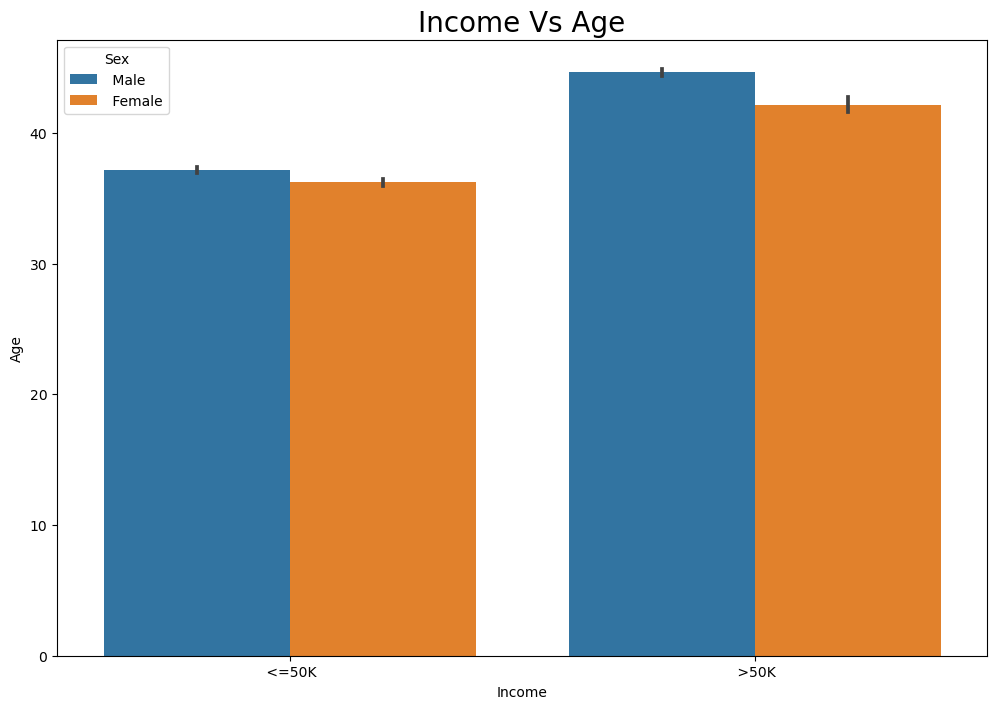

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(x='Income',y='Age',data=data,hue='Sex')
plt.title("Income Vs Age",fontsize=20)

In [ ]:
plt.figure(figsize=(12,8))
sns.factorplot(x='Workclass',y='Education_num',hue='Income',data=data)

In [ ]:
sns.factorplot(x='Sex',y='Education_num',data=data,hue='Income')
plt.xticks(rotation=90)
     

In [ ]:
sns.factorplot(x='Race',y='Education_num',hue='Income',data=data)
plt.xticks(rotation=90,fontsize=12)

In [ ]:
sns.factorplot(x='Occupation',y='Education_num',hue="Income",data=data)
plt.xticks(rotation=90,fontsize=12)
     

<Axes: xlabel='Age', ylabel='Hours_per_week'>

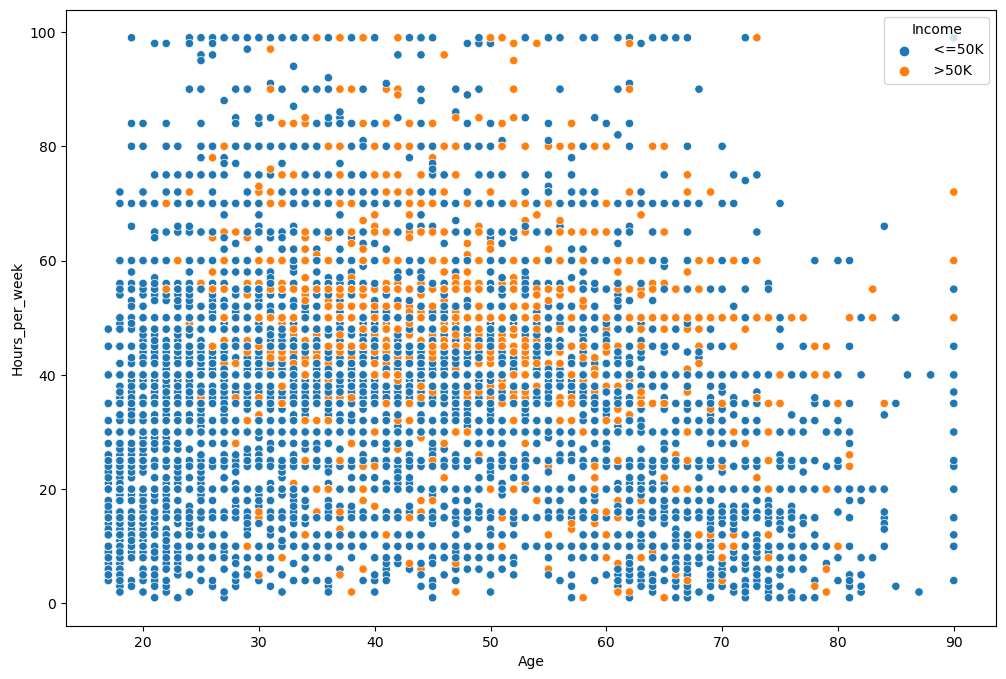

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age',y='Hours_per_week',data=data,hue='Income')

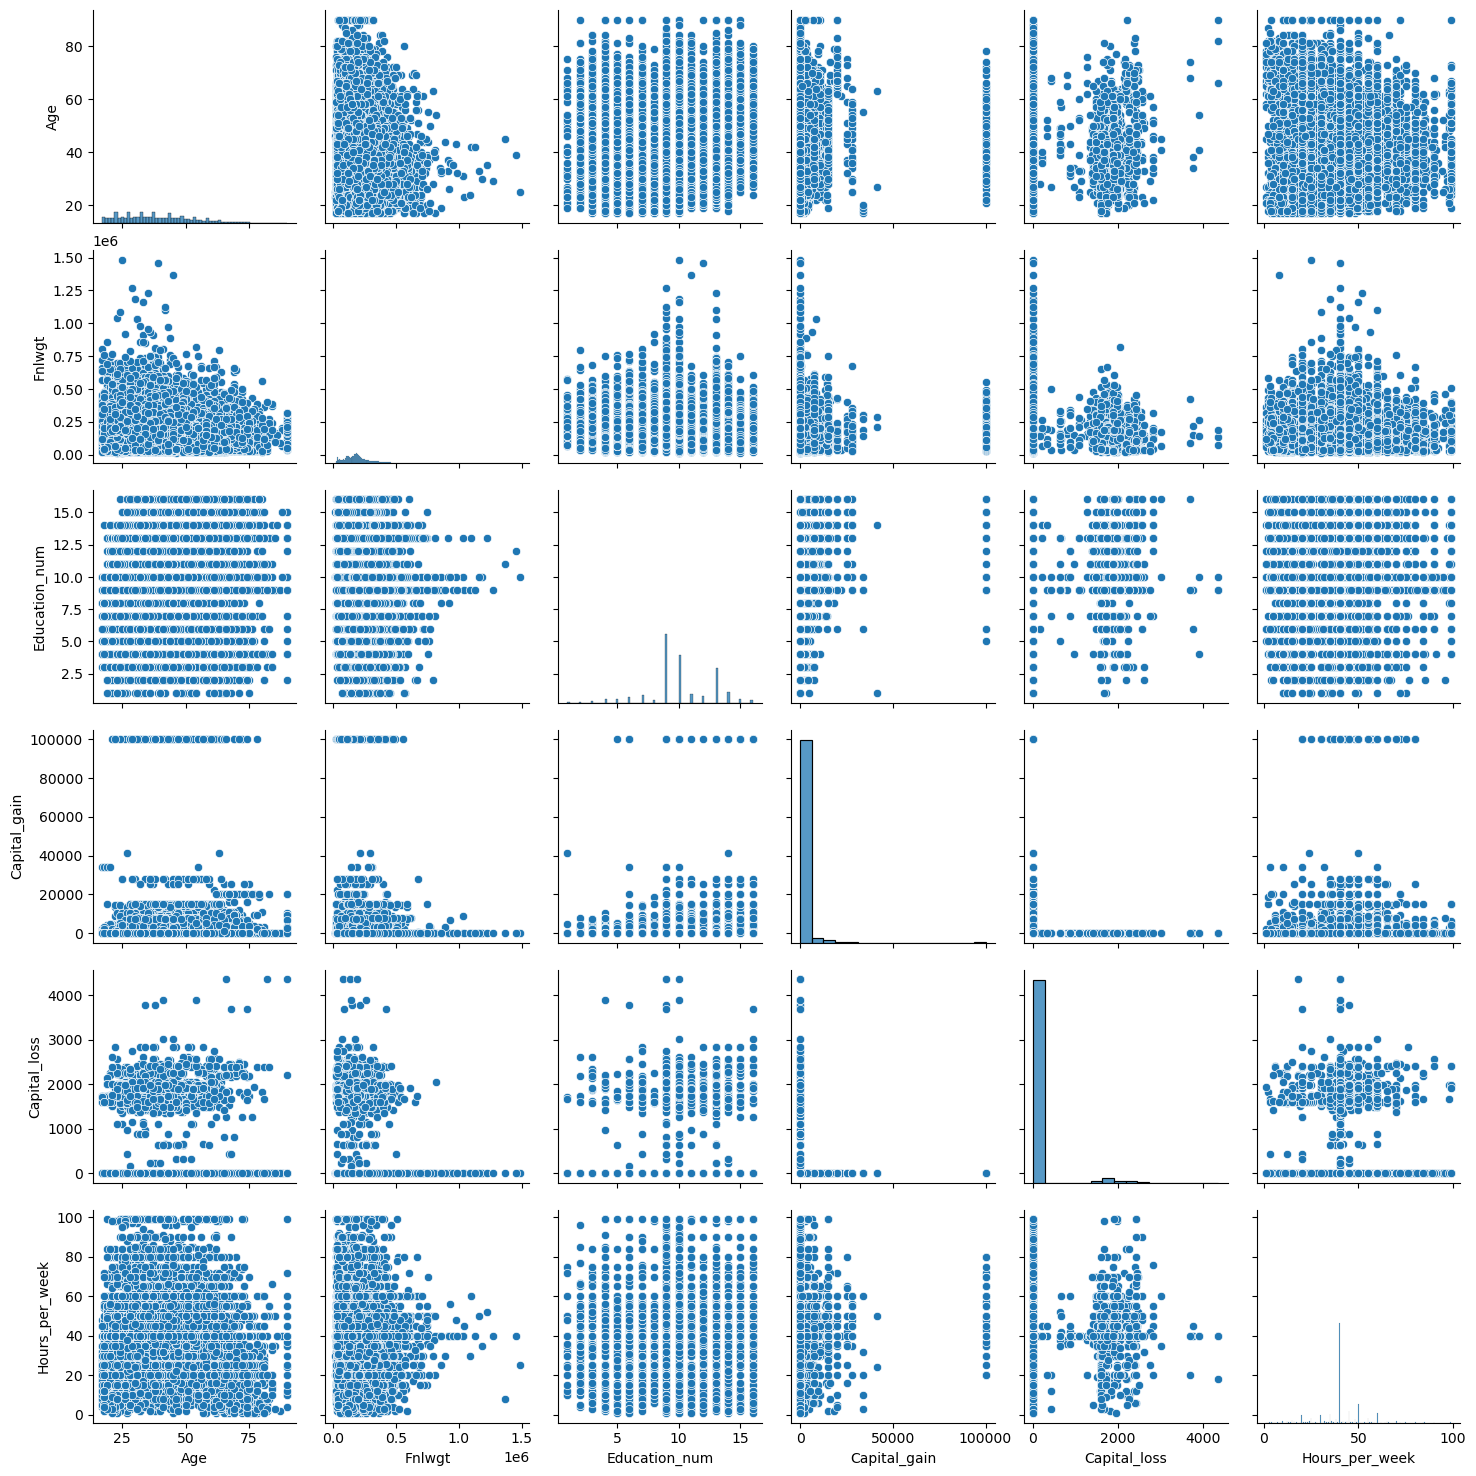

In [28]:
sns.pairplot(data)

In [29]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,power_transform

In [30]:
Oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df[column]=Oe.fit_transform(df[column])
  return df

In [31]:
data=ordinal_encoder(data,['Education','Income','Marital_status','Occupation','Race','Relationship','Sex','Workclass'])
     

In [32]:
def preprocessing(df):
  df=df.copy()
  le=LabelEncoder()
  df['Native_country']=le.fit_transform(df['Native_country'])
  X=df.drop('Income',axis=1)
  y=df['Income']
  return X,y

In [33]:
X,y=preprocessing(data)

In [34]:
]:

X

SyntaxError: unmatched ']' (1846114628.py, line 1)

<Axes: >

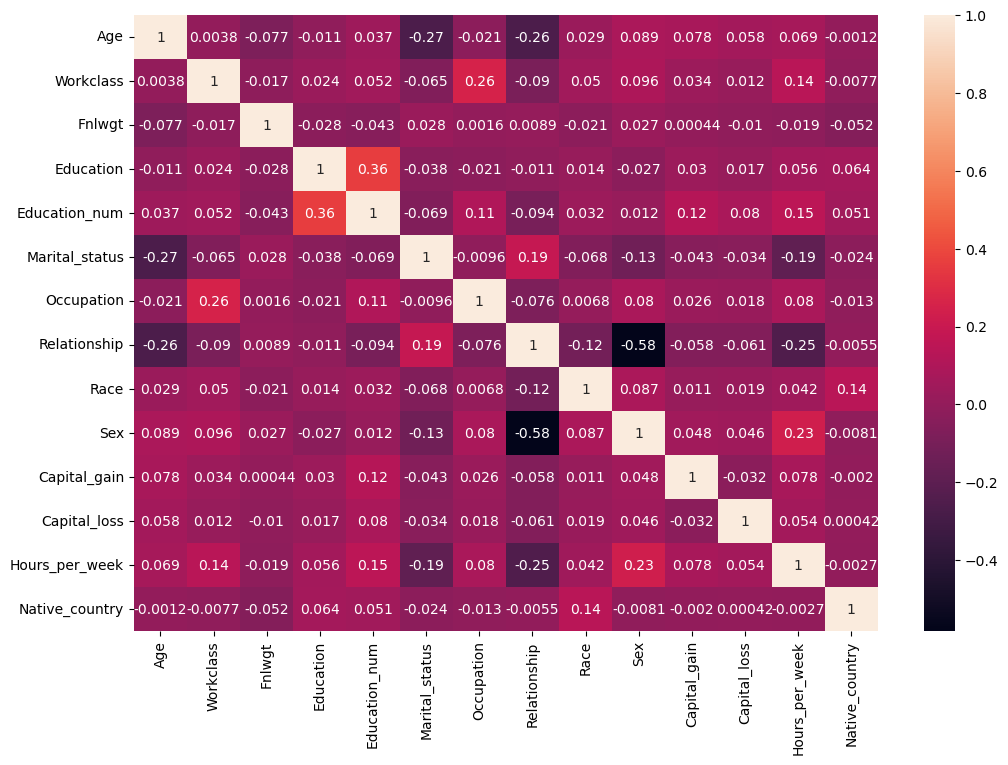

In [35]:
X_corr=X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(X_corr,annot=True)
     

In [37]:


x=X

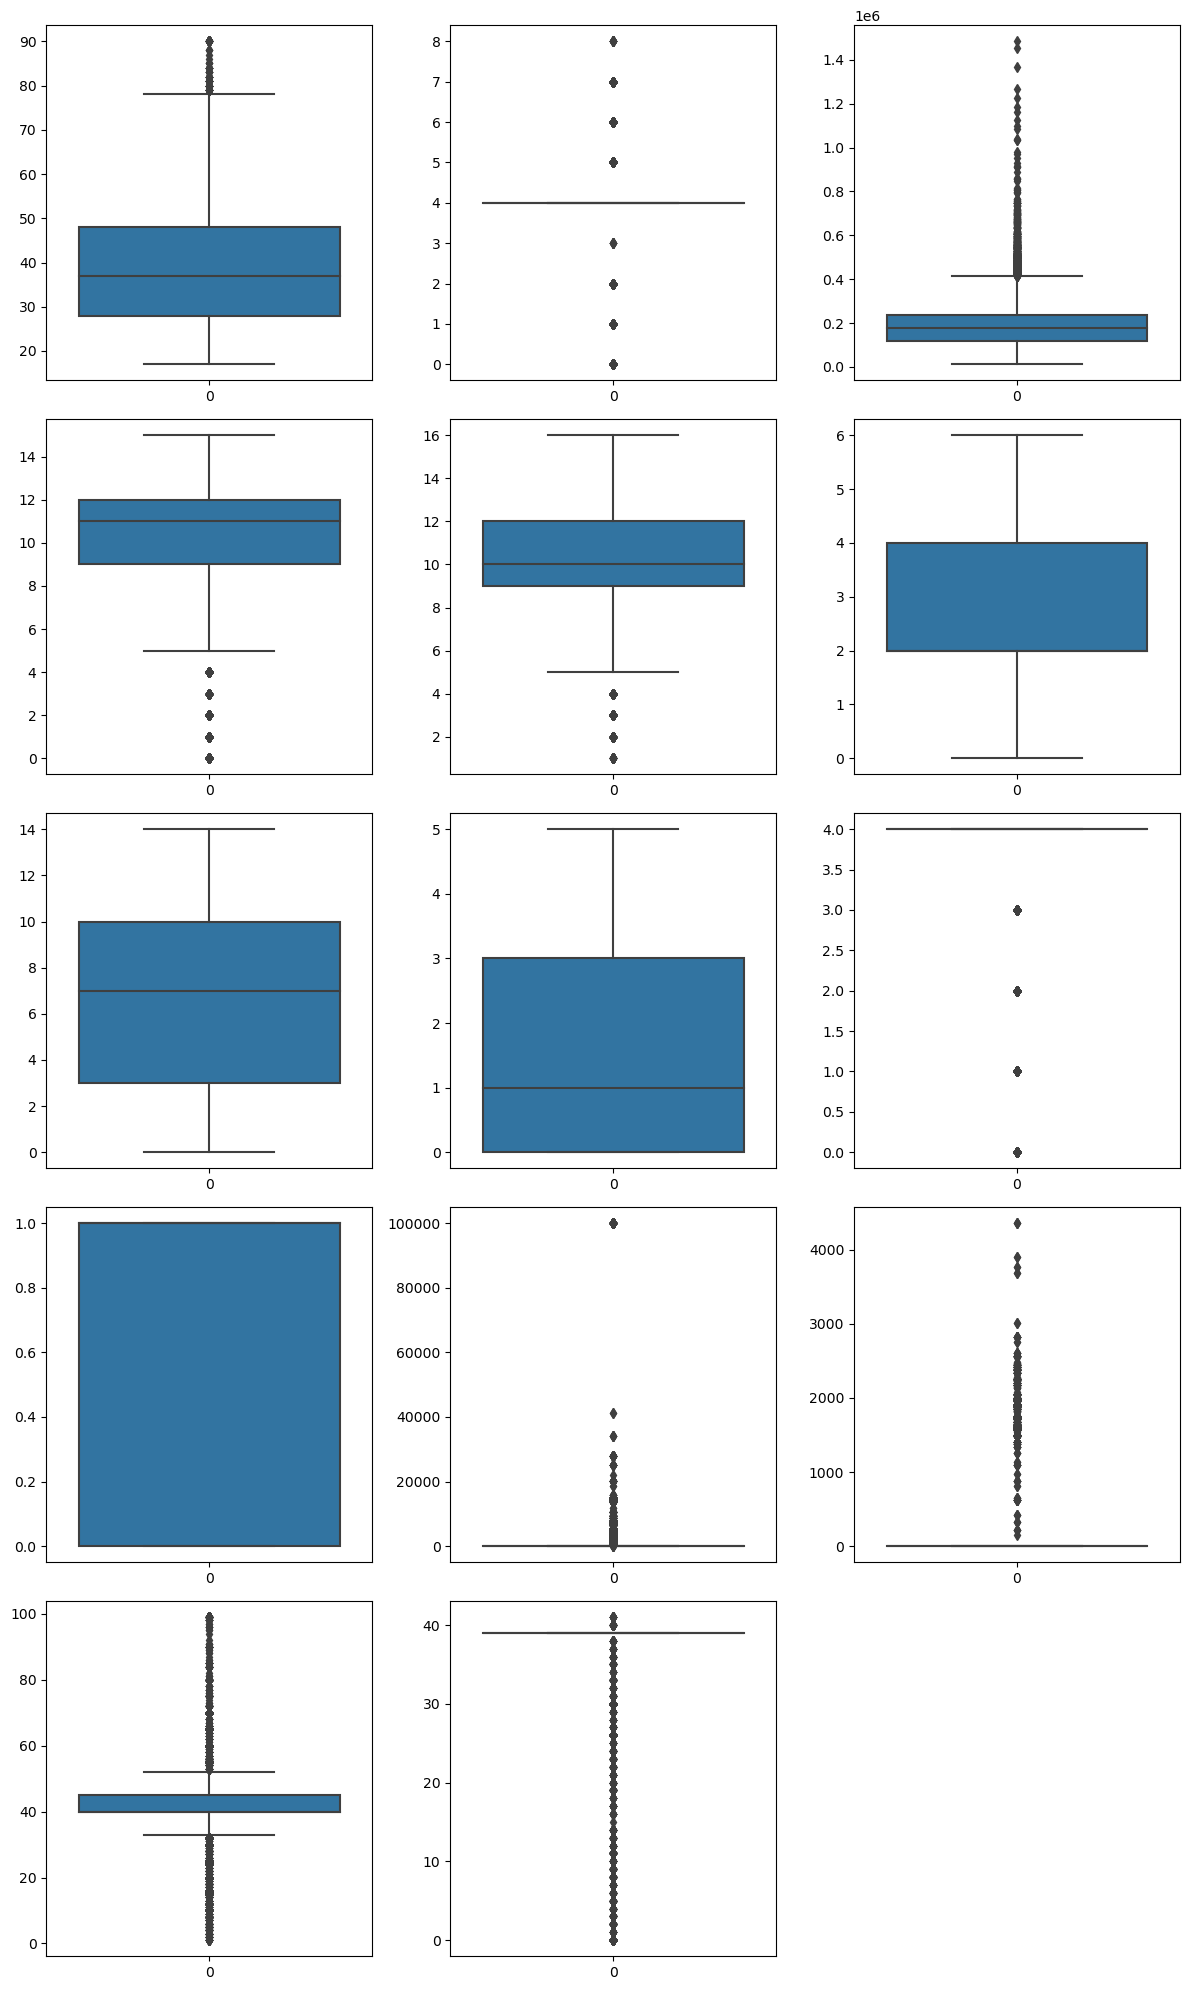

In [38]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(5,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

In [39]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]]=percentile[0]
  X[col][X[col]>=percentile[1]]=percentile[1]
     

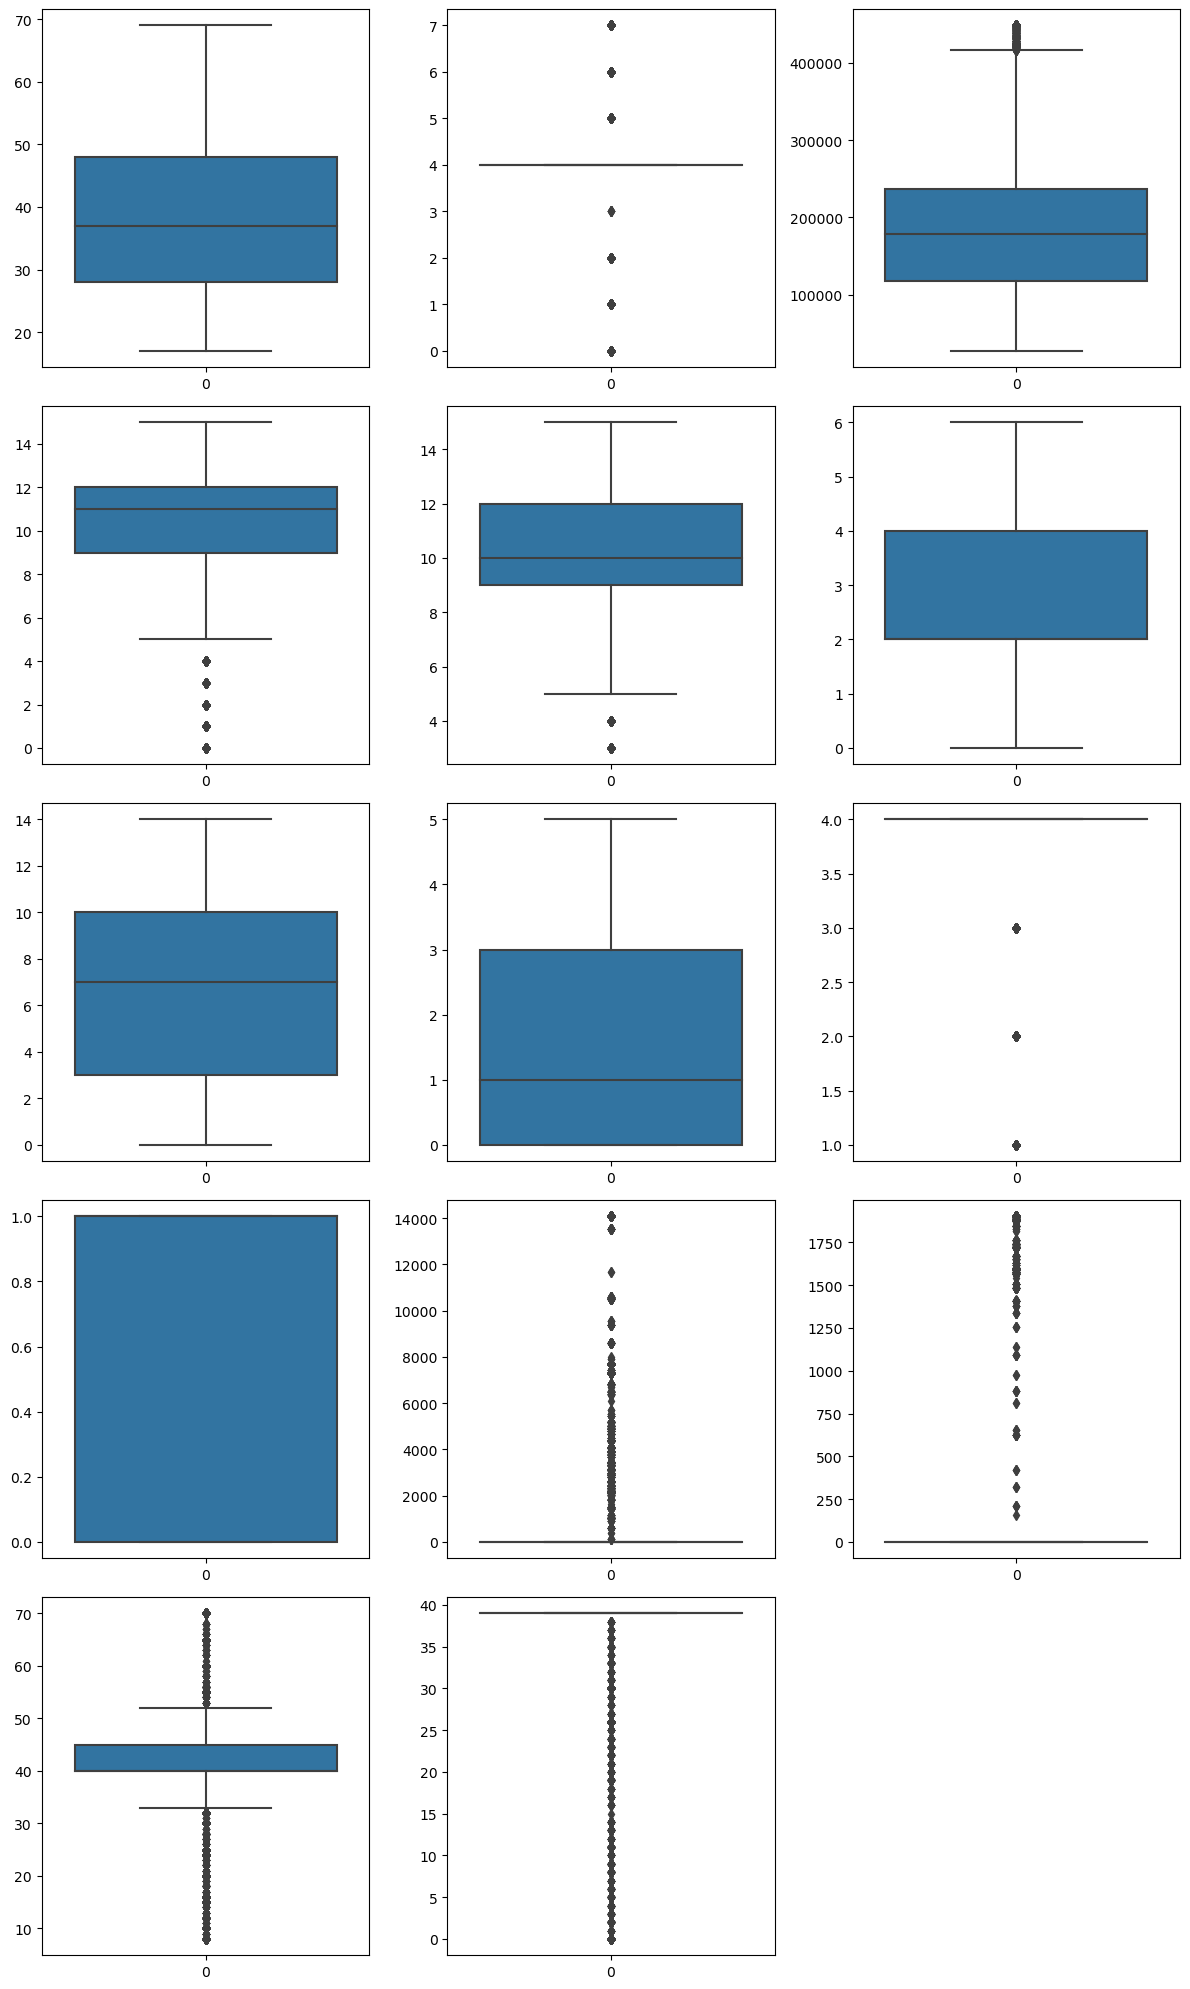

In [40]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(5,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

In [42]:
smote=SMOTE(random_state=42)
X_res,y_res=SMOTE.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Income'])

NameError: name 'SMOTE' is not defined

NameError: name 'y_new' is not defined

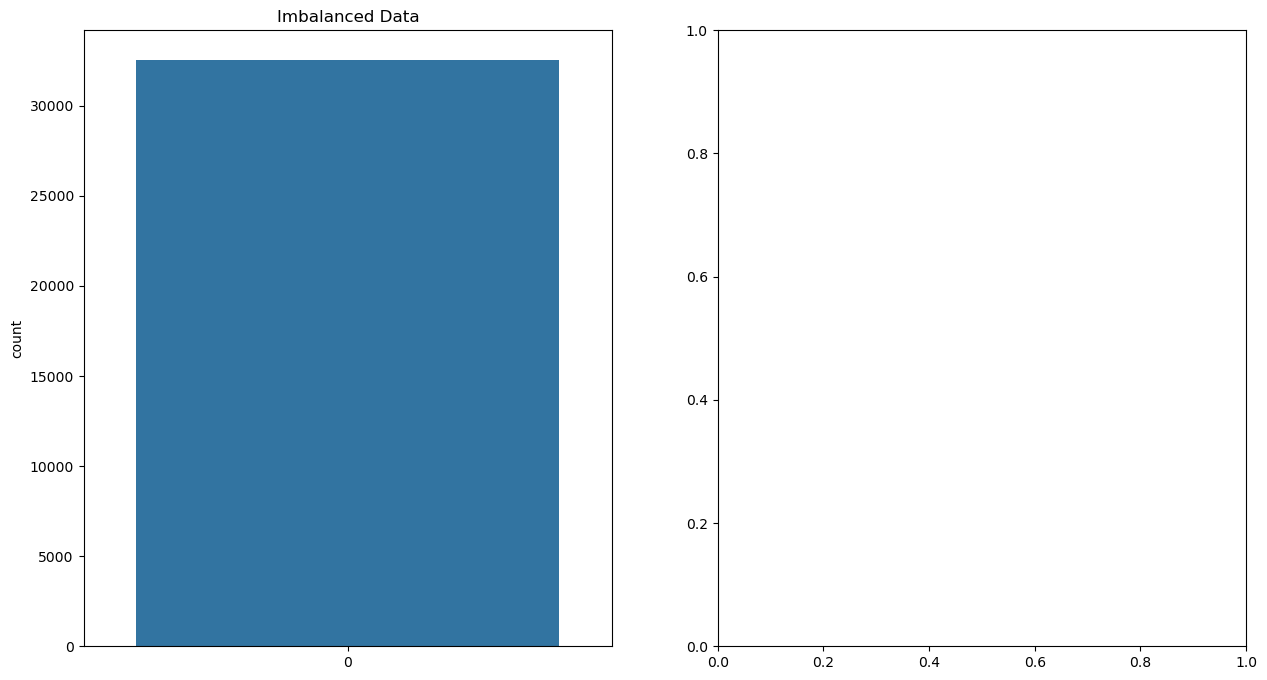

In [43]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(data['Income'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Income'])
plt.title("Balanced data")
     

In [44]:
print(data.shape)
print(X_new.shape)

(32560, 15)


NameError: name 'X_new' is not defined

In [45]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold

In [46]:
47]:

X.skew()

SyntaxError: unmatched ']' (1567663677.py, line 1)

In [47]:
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

NameError: name 'X_new' is not defined

In [48]:


x_new.skew()

NameError: name 'x_new' is not defined

In [ ]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)
     

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [51]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [55]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [58]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "ExtraTreesClassifier":ExtraTreesClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    
    
}

In [59]:
skf=StratifiedKFold(n_splits=5,shuffle=True)
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  ac=accuracy_score(y_test,y_pred)
  Score.append(ac)
  print("Accuracy_Score",ac)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion metrics')
  print('\n')
  print(cm)
  print("CLASSIFICATION REPORT")
  report=classification_report(y_test,y_pred)
  print('\n')
  print(report)
  csv=cross_val_score(model,X_new,y_new,cv=skf).mean()
  CVS.append(csv*100)
  print("Cross_Val_Score",csv)
  print('\n')
  print("ROC AUC CURVE")
  plt.figure(figsize=(12,8))
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['<=50k','>50k'],micro=False,macro=False)
  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

*************************************************** LogisticRegression ************************************************************


NameError: name 'X_train' is not defined

In [60]:
LGB.get_params()

NameError: name 'LGB' is not defined

In [ ]:
param={
    'boosting_type': ['gbdt','dart','gross','rf'],
    'n_estimators':[100,500],
    'learning_rate':[0.1,0.01,0.001],
    'importance_type': ['split','gain'],
}

In [ ]:
GRID=GridSearchCV(estimator=LGB,scoring='accuracy',param_grid=param,n_jobs=-1,cv=skf)

In [ ]:
GRID.fit(X_new,y_new)

In [ ]:


GRID.best_score_

In [ ]:


GRID.best_params_

In [ ]:
LGBM=LGBMClassifier(boosting_type= 'dart',
 importance_type= 'split',
 learning_rate= 0.1,
 n_estimators= 500)

In [ ]:
new_csv=cross_val_score(LGBM,X_new,y_new,cv=skf).mean()
new_csv

In [61]:
LGBM.fit(X_train,y_train)
y_p=LGBM.predict(X_test)
print(accuracy_score(y_test,y_p))

NameError: name 'LGBM' is not defined

In [62]:
print("ROC AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(LGBM,X_train,y_train,X_test=X_test,y_test=y_test,classes=['<=50k','>50k'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(LGBM,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
plt.show()
     

ROC AUC CURVE


NameError: name 'roc_auc' is not defined

<Figure size 1200x800 with 0 Axes>

In [63]:
print("Confusion matrics")
print('\n')
print(confusion_matrix(y_test,y_p))
print("Classifiaction_report")
print('\n')
print(classification_report(y_test,y_p))
print("Accuracy Score",accuracy_score(y_test,y_p))

Confusion matrics




NameError: name 'confusion_matrix' is not defined

In [ ]:
import joblib
joblib.dump(GRID,"CensusClassifier.obj")
     

In [ ]:
model=joblib.load('/content/CensusClassifier.obj')

In [ ]:
model.predict(X_test)